<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Übung 10</h1>
    Ausgabe: 13. Januar 2023 10:00 Uhr, Abgabe: 20. Januar 2023 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 3: Monte-Carlo Methode zur Ermittlung von Bias und
Varianz (12P)</h3>
</font>

Oft können Bias und Varianz einer Anpassungsmethode nicht analytisch bestimmt werden. Deswegen muss man auf die Monte-Carlo-Methode zurückgreifen, um eine Aussage über diese beiden Grössen treffen zu können.
Dabei gibt es verschiedene Möglichkeiten, eine Anpassung mit Histogrammen durchzuführen, z.B.:
   * Erweiterte gebinnte Maximum-Likelihood Anpassung (Extended binned maximum likelihood)
   * Gebinnte Anpassung mit der Methode der kleinsten Quadrate (Binned least square method)
   
Im folgenden sollen der Bias und die Varianz dieser beiden Anpassungsmethoden zur Ermittlung des Zerfallsparameters einer Exponentialfunktion untersucht und verglichen werden.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.stats as stat
import math

In [29]:
## von Übungsblatt 5:
def listOfBins(xmin, xmax, nbins):
    return [xmin+(xmax-xmin)/nbins*i for i in range(nbins+1)] ## +1 since we need the upper bound as well

In [ ]:
# von Übungsblatt 8:
def createData(l, n):
    return np.random.exponential(1/l, n)

<font face="Times New Roman" size=4>
a) Erzeugung und Darstellung der Pseudo-Daten (1P)
</font>

Zuerst müssen wir so wie in den vorangegangenen Übungsblättern wieder die Pseudo-Daten erzeugen. Erstellen Sie also eine Liste von exponentialverteilten Zufallszahlen mit einer Stichprobengröße von 1000 und $\lambda=1/2$. Stellen Sie die Verteilung graphisch in einem `matplotlib` Histogramm dar, und lassen Sie sich die Binhöhen und -grenzen zurückgeben. Verwenden Sie den Seed 8743 um Ihre Ergebnisse reproduzierbar zu machen.

In [1]:
# passe createData an um auch den Seed zu verwenden
def createData(l, n, seed=8743):
    np.random.seed(seed)
    return np.random.exponential(1 / l, n)


data = createData(1/2, 1000)
data

NameError: name 'np' is not defined

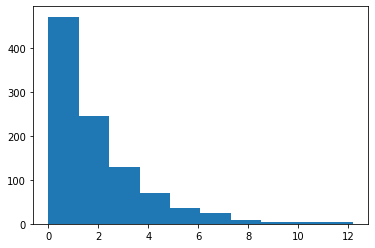

Bin heights: [471 246 130  71  36  25   9   3   5   4]
Bin edges: [0.0023888807209532237, 1.2190966465192918, 2.435804412317631, 3.6525121781159693, 4.869219943914308, 6.085927709712647, 7.302635475510985, 8.519343241309326, 9.736051007107664, 10.952758772906002, 12.169466538704341]


In [30]:
bins1 = listOfBins(min(data), max(data), 10)
plt.hist(data, bins=bins1)
plt.show()
hist, bins = np.histogram(data, bins=bins1)
# hist, bins, t= plt.hist(data, ins=bins1)
print("Bin heights:", hist)
print("Bin edges:", bins1)

<font face="Times New Roman" size=4>
b) Maximum-Likelihood Schätzung (2P)
</font>

Führen Sie als erste Abschätzung von $\hat{\lambda}$ die Maximum-Likelihood Methode durch.

/var/folders/hy/jy4kjcxj6q96t_6x75rjt_fr0000gn/T/ipykernel_24420/4119518708.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(l + 1e-10) - l*data)
/var/folders/hy/jy4kjcxj6q96t_6x75rjt_fr0000gn/T/ipykernel_24420/4119518708.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(l + 1e-10) - l*data)
/var/folders/hy/jy4kjcxj6q96t_6x75rjt_fr0000gn/T/ipykernel_24420/4119518708.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(l + 1e-10) - l*data)


Maximum Likelihood estimate of lambda: -1033.24


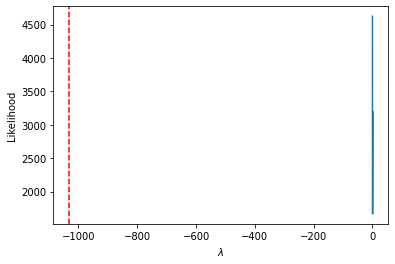

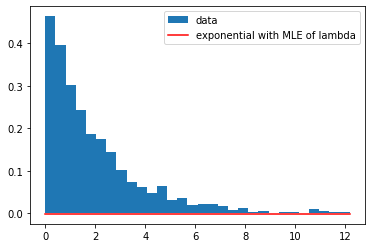

In [36]:
# Define the likelihood function
# def likelihood(l, data):
#     return -np.sum(np.log(l) - l*data)

def likelihood(l, data):
    return -np.sum(np.log(l + 1e-10) - l*data)


# Find the maximum likelihood estimate of lambda
result = opt.minimize(likelihood, x0=1, args=(data,))
l_hat = result.x[0]
print("Maximum Likelihood estimate of lambda:", l_hat)

# Plot the likelihood function
l_range = np.linspace(0.01, 2, 100)
likelihood_values = [-np.sum(np.log(l) - l*data) for l in l_range]
#likelihood_values = likelihood(l_range, data)
#likelihood_values = -np.sum(np.log(l_range) - l_range*np.ones((100,1))*data, axis=1)
plt.plot(l_range, likelihood_values)
plt.axvline(x=l_hat, color='r', linestyle='--')
plt.xlabel('$\lambda$')
plt.ylabel('Likelihood')
plt.show()


# plot exponential distribution with maximum likelihood estimate
plt.hist(data, bins='auto', density=True, label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, 1/l_hat*np.exp(-x/l_hat), '-r',
         label='exponential with MLE of lambda')
plt.legend()
plt.show()


<font face="Times New Roman" size=4>
c) Gebinnte Schätzung mit der Methode der kleinsten Quadrate (5P)
</font>

Nun wollen wir die Methode der kleinsten Quadrate durchführen, um eine Abschätzung für $\lambda$ zu bekommen. Verwenden Sie dazu die Funktion `least_squares` von `scipy.optimize` und füttern Sie sie mit der Differenz zwischen Binhöhen (am Binmittelpunkt in $x$ Richtung) und Funktionswert der Exponentialverteilung.

Least Squares estimate of lambda: 401919.0


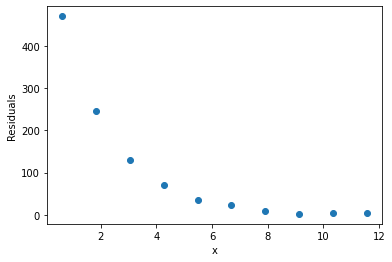

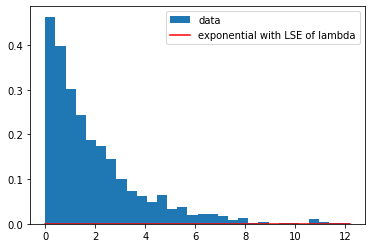

In [37]:
# Define the function to be minimized

def residuals(l, x, y):
    return y - np.exp(-x/l)


# Find the least squares estimate of lambda
result = opt.least_squares(residuals, x0=1, args=(
    bins[:-1] + (bins[1]-bins[0])/2, hist))
l_hat = result.x[0]
print("Least Squares estimate of lambda:", l_hat)

# Plot the residuals
plt.plot(bins[:-1] + (bins[1]-bins[0])/2, residuals(l_hat,
         bins[:-1] + (bins[1]-bins[0])/2, hist), 'o')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.show()


# plot exponential distribution with least square estimate

plt.hist(data, bins='auto', density=True, label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, 1/l_hat*np.exp(-x/l_hat), '-r',
         label='exponential with LSE of lambda')
plt.legend()
plt.show()
# Schätzer muss 0.5 sein (Anmerkung: MM)

Alternativ können wir auch die Funktion `curve_fit` verwenden, und sie direkt mit der Funktion `expFunc` und den $x$- und $y$-Werten der Bins füttern. Allerdings müssen wir den Parameter `full_output` auf `True` setzen, damit der ganze Output angezeigt wird. Der Fehler auf dem Parameter kann dann mittels `np.sqrt(np.diag(result[1]))` berechnet werden.

Least Squares estimate of lambda: 436347.29521591094
Standard error of lambda: [9.22412066e+11]


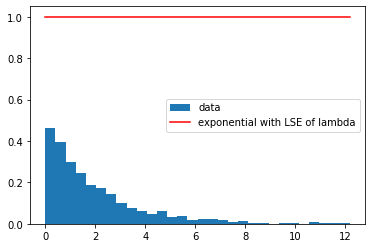

In [38]:
# Define the exponential function

def expFunc(x, l):
    return np.exp(-x/l)
# Fit the exponential function to the binned data


result = opt.curve_fit(
    expFunc, bins[:-1] + (bins[1]-bins[0])/2, hist, full_output=True)
# Extract the parameter estimate and the covariance matrix

l_hat, cov = result[0][0], result[1]
# Compute the standard error of the estimate

l_std = np.sqrt(np.diag(cov))

print("Least Squares estimate of lambda:", l_hat)
print("Standard error of lambda:", l_std)
# plot exponential distribution with least square estimate

plt.hist(data, bins='auto', density=True, label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, expFunc(x, l_hat), '-r', label='exponential with LSE of lambda')
plt.legend()
plt.show()


Eine vierte und letzte Methode den Parameter $\lambda$ abzuschätzen ist via der `leastsq` Funktion, die den Levenberg-Marquadt Algorithmus verwendet. Implementieren Sie diese auch und lassen Sie sich den Output anzeigen. Der Fehler kann wieder so wie bei `curve_fit` berechnet werden.

Least Squares estimate of lambda: 436347.29521591094
Standard error of lambda: 1.0


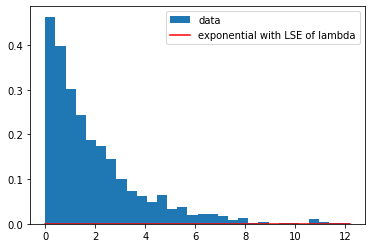

In [39]:
# Define the function to be minimized
def residuals(params, x, y):
    l = params
    return y - np.exp(-x/l)


# Find the least squares estimate of lambda
result = opt.leastsq(residuals, x0=1, args=(
    bins[:-1] + (bins[1]-bins[0])/2, hist))
l_hat = result[0][0]
print("Least Squares estimate of lambda:", l_hat)

# Compute the standard error of the estimate
cov = result[1]
#l_std = np.sqrt(np.diag(cov))
l_std = np.sqrt(cov)


print("Standard error of lambda:", l_std)

# plot exponential distribution with least square estimate
plt.hist(data, bins='auto', density=True, label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, 1/l_hat*np.exp(-x/l_hat), '-r',
         label='exponential with LSE of lambda')
plt.legend()
plt.show()


<font face="Times New Roman" size=4>
d) Vergleich der Methoden (4P)
</font>

Wir wollen nun die Maximum-Likelihood Methode und die Methode der kleinsten Quadrate vergleichen und führen sie dazu beide 500 Mal aus. Erstellen Sie also einen `for` Loop anhand dessen die Schätzwerte der beiden Methoden generiert und in eine Liste `lst_est_ml` (Maximum-Likelihood) bzw. `lst_est_kq` (kleinste Quadrate) befüllt werden. Überprüfen Sie in jedem Durchlauf, ob die Fits erfolgreich waren; falls nicht, gehen Sie weiter zur nächsten Iteration. Verändern Sie in jeder Iteration den Wert des `seed` Parameters in der `createData` Funktion, um nicht jedes Mal die gleiche Verteilung zu erzeugen. Hierzu können Sie eine ganzzahlige Zufallszahl zwischen 0 und 100000 mit der Funktion `randint` im Paket `numpy.random` erzeugen.

In [40]:
np.random.seed(8743)

lst_est_ml = []
lst_est_kq = []

def negative_log_likelihood(l, data):
    n = len(data)
    return -n*np.log(l) - l*np.sum(data)

# def negative_log_likelihood(l, data):
#     n = len(data)
#     return -n*np.log(l + 1e-10) - l*np.sum(data)

for i in range(500):
    seed = np.random.randint(0, 100000)
    data = createData(1/2, 1000, seed)
    hist, bins = np.histogram(data, bins='auto')

    # Maximum Likelihood Method
    bnds = [(1e-10, None)]
    result = opt.minimize(negative_log_likelihood, x0=1, args=(data,), bounds=bnds)
    if result.success:
        l_hat_ml = result.x[0]
        lst_est_ml.append(l_hat_ml)
        
    # result = opt.minimize(negative_log_likelihood, x0=1, args=(data,))
    # if result.success:
    #     l_hat_ml = result.x[0]
    #     lst_est_ml.append(l_hat_ml)

    # Least Squares Method
    result = opt.least_squares(residuals, x0=1, args=(
        bins[:-1] + (bins[1]-bins[0])/2, hist))
    if result.success:
        l_hat_kq = result.x[0]
        lst_est_kq.append(l_hat_kq)


Erzeugen Sie nun zwei Histogramme, jeweils eins für die Schätzwerte der beiden Methoden, und stellen Sie beide in der gleichen Abbildung dar. Wählen Sie vernünftige Histogrammgrenzen für die $x$ Achse, und fügen Sie Achsenbezeichnungen hinzu. Vergessen Sie nicht die Bezeichnungen hinzuzufügen und die Legende zu aktivieren. Sie können auch für die beiden Diagramme den Parameter `alpha` auf `0.5` setzen, damit die Histogramme zu 50% transparent sind (dann sieht man sie überlappen).

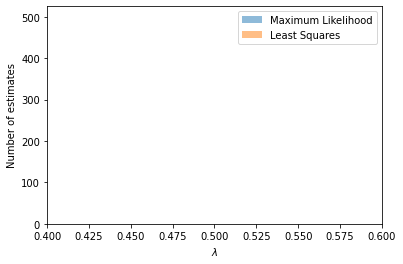

In [26]:
# Plot the histograms
plt.hist(lst_est_ml, bins=50, alpha=0.5, label='Maximum Likelihood')
plt.hist(lst_est_kq, bins=50, alpha=0.5, label='Least Squares')

# Add labels and legend
plt.xlabel('$\lambda$')
plt.ylabel('Number of estimates')
plt.legend()

# Set the x-axis limits
plt.xlim(0.4, 0.6)

# Show the plot
plt.show()


Berechnen und vergleichen Sie nun die Mittelwerte und die Standardabweichungen der beiden Listen, die Sie erzeugt haben. Was stellen Sie fest im Vergleich der beiden Methoden? Welches ist die genaueste Methode (kleinster Bias), welches die präziseste (kleinster Fehler)? 

In [27]:
mean_ml = np.mean(lst_est_ml)
std_ml = np.std(lst_est_ml)

mean_kq = np.mean(lst_est_kq)
std_kq = np.std(lst_est_kq)


/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
